 **Task 1 :
Plot all sample points (train data) from both classes, but samples from the same class should have
the same color and marker.**

In [1]:
import matplotlib.pyplot as plt

In [2]:
trainData = {}
entry = []

with open("train_knn.txt") as f:
    for line in f:
        entry = line.split(",")
        if (entry[2][-1] == '\n'):
            classInfo =  entry[2][:-1]
        else:
            classInfo =  entry[2]
        trainData[(int(entry[0]),int(entry[1]))] = int(classInfo)
    print(trainData)

{(7, 7): 1, (7, 4): 1, (6, 4): 1, (7, 5): 1, (7, 6): 1, (6, 7): 1, (6, 6): 1, (3, 4): 2, (2, 3): 2, (3, 2): 2, (4, 3): 2, (3, 3): 2, (4, 4): 2, (1, 4): 2}


In [3]:
trainData1x = []
trainData1y = []
trainData2x = []
trainData2y = []

for coor , classinfo in trainData.items():
    if(classinfo == 1):
        trainData1x.append(coor[0]);
        trainData1y.append(coor[1]);
    else:
        trainData2x.append(coor[0]);
        trainData2y.append(coor[1]);
    
print(trainData1x , trainData1y)
print(trainData2x , trainData2y)


[7, 7, 6, 7, 7, 6, 6] [7, 4, 4, 5, 6, 7, 6]
[3, 2, 3, 4, 3, 4, 1] [4, 3, 2, 3, 3, 4, 4]


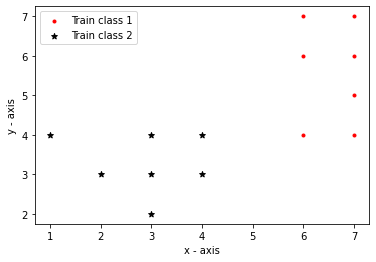

In [4]:
plt.scatter(trainData1x, trainData1y, color = 'r', marker = ".", label = 'Train class 1')

plt.scatter(trainData2x, trainData2y, color = 'k', marker = "*", label = 'Train class 2')

plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.legend(loc = 'upper left')

plt.show()


# Task 2



loading the test data

In [5]:
testData = {}
entry = []

with open("test_knn.txt") as f:
    for line in f:
        entry = line.split(",")
        if (entry[1][-1] == '\n'):
            entry[1] =  entry[1][:-1]
        
        classInfo =  0
        testData[(int(entry[0]),int(entry[1]))] = int(classInfo)
    print(testData)

{(3, 7): 0, (7, 7): 0, (4, 3): 0, (2, 8): 0, (3, 5): 0, (1, 2): 0, (4, 8): 0, (8, 3): 0, (8, 4): 0}


In [6]:
import math

In [7]:
def euclidianDistance(queryInstance, trainingSamples):
    distance = math.sqrt(math.pow(queryInstance[0] - trainingSamples[0] , 2) + math.pow( queryInstance[1] - trainingSamples[1],2 ) )
    
    
    return distance 

In [8]:
euclidianDistance((1,1),(2,2) )

1.4142135623730951

In [9]:
def getDistancesForOneTestSample(testSample , trainData):
    distances = {}
    
    for trainSample in trainData:
        distances[trainSample] = euclidianDistance(testSample , trainSample )

    return distances

In [10]:
def getSortedDistancesForOneTestSample(testSample , trainData):
    distances = getDistancesForOneTestSample(testSample , trainData)
    #print(distances)

    sortedDistances = {k: v for k, v in sorted(distances.items(), key=lambda item: item[1])}

    return sortedDistances

In [11]:
def getKNearestNeighborforOneTestSample(k ,testSample , trainData ):
    sortedDistences = getSortedDistancesForOneTestSample(testSample , trainData)
    sortedDistenceList = list(sortedDistences.keys())
    return sortedDistenceList[:k], sortedDistences

In [12]:
def getClassForaSingletestSample(k ,testSample , trainData ):
    kNearestNeighbors , Distances  = getKNearestNeighborforOneTestSample(k ,testSample , trainData )
    kNearestNeighbors , Distances
    
    classList = []
    f = open("prediction.txt", "a")
    
    f.write("Test point : " + str(testSample) + "\n")
    print( "Test point : " + str(testSample) + "\n")


    index = 0
    for eachTestItem in kNearestNeighbors:
        index += 1 
        string =   "Distance "  + str(index) +": "+str("{:.2f}".format(Distances[eachTestItem]))+ "   " + "class: " +str(trainData[eachTestItem])+"\n" 
        print( string)
        
        f.write(string)
        
        classList.append(trainData[eachTestItem])
    
      
    
    print(classList)
    
    selectedClass = marorityVote(classList)
    print("Predicted class:" , selectedClass)
    f.write("Predicted class:" + str(selectedClass) + "\n"  + "\n")
    f.close()
    
    return  selectedClass
    
    

In [13]:
def marorityVote(listofNumbers):
    
    uniqueValues = set(listofNumbers)
    
    countDictionary = {}
    
    count = 0
    
    for eachuniqueValue in uniqueValues:
        for eachElement in listofNumbers:
            if(eachuniqueValue == eachElement):
                count += 1
        countDictionary[eachuniqueValue] = count
        count = 0
                
    sortedCountDictionary = {k: v for k, v in sorted(countDictionary.items(), key=lambda item: item[1])}
    decision = list(sortedCountDictionary.keys())[-1]
    return decision

In [14]:
marorityVote([1, 2, 1,3])

1

In [15]:

k = int(input("k = "))

for testSample in testData.keys():
    testData[testSample] = getClassForaSingletestSample(k ,testSample , trainData )
    
testData

k = 5
Test point : (3, 7)

Distance 1: 3.00   class: 1

Distance 2: 3.00   class: 2

Distance 3: 3.16   class: 1

Distance 4: 3.16   class: 2

Distance 5: 3.61   class: 2

[1, 2, 1, 2, 2]
Predicted class: 2
Test point : (7, 7)

Distance 1: 0.00   class: 1

Distance 2: 1.00   class: 1

Distance 3: 1.00   class: 1

Distance 4: 1.41   class: 1

Distance 5: 2.00   class: 1

[1, 1, 1, 1, 1]
Predicted class: 1
Test point : (4, 3)

Distance 1: 0.00   class: 2

Distance 2: 1.00   class: 2

Distance 3: 1.00   class: 2

Distance 4: 1.41   class: 2

Distance 5: 1.41   class: 2

[2, 2, 2, 2, 2]
Predicted class: 2
Test point : (2, 8)

Distance 1: 4.12   class: 1

Distance 2: 4.12   class: 2

Distance 3: 4.12   class: 2

Distance 4: 4.47   class: 1

Distance 5: 4.47   class: 2

[1, 2, 2, 1, 2]
Predicted class: 2
Test point : (3, 5)

Distance 1: 1.00   class: 2

Distance 2: 1.41   class: 2

Distance 3: 2.00   class: 2

Distance 4: 2.24   class: 2

Distance 5: 2.24   class: 2

[2, 2, 2, 2, 2]
Predicte

{(3, 7): 2,
 (7, 7): 1,
 (4, 3): 2,
 (2, 8): 2,
 (3, 5): 2,
 (1, 2): 2,
 (4, 8): 1,
 (8, 3): 1,
 (8, 4): 1}

**Plotting the result**

In [16]:
testData1x = []
testData1y = []
testData2x = []
testData2y = []

for coor , classinfo in testData.items():
    if(classinfo == 1):
        testData1x.append(coor[0]);
        testData1y.append(coor[1]);
    else:
        testData2x.append(coor[0]);
        testData2y.append(coor[1]);
    
print(testData1x , testData1y)
print(testData2x , testData2y)


[7, 4, 8, 8] [7, 8, 3, 4]
[3, 4, 2, 3, 1] [7, 3, 8, 5, 2]


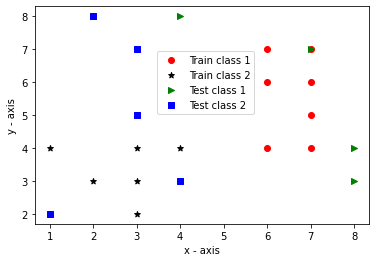

In [17]:
plt.scatter(trainData1x, trainData1y, color = 'r', marker = "o", label = 'Train class 1')

plt.scatter(trainData2x, trainData2y, color = 'k', marker = "*", label = 'Train class 2')

plt.scatter(testData1x, testData1y, color = 'g', marker = ">", label = 'Test class 1')

plt.scatter(testData2x, testData2y, color = 'b', marker = "s", label = 'Test class 2')


plt.xlabel('x - axis')
plt.ylabel('y - axis')

#plt.legend(loc = 'center left')
plt.legend(loc='center left', bbox_to_anchor=(.35, 0.65))

plt.show()
